In [1]:
import numpy as np
import pandas as pd
import pickle
import glob
import gzip
import tqdm

This file explores the processed data given to us by Yixuan. It assumes the `adj_mat.pkl` and `LA_part0_speed.h5` files are in the data/processed/ directory.

In [76]:
# read data
with open('../data/processed/adj_mat.pkl', 'rb') as f:
  adj_mat = pickle.load(f)

speed_df = pd.DataFrame(pd.read_hdf('../data/processed/LA_part0_speed.h5'))

In [3]:
# adjacency matrix: (station x station) with distances between each
print(adj_mat[0][0:5])
print()
print(adj_mat[2])

['716942', '763237', '716951', '718371', '716953']

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.15040863 ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.66280293 0.         0.        ]
 ...
 [0.         0.         0.16950457 ... 1.         0.         0.        ]
 [0.         0.         0.15010625 ... 0.73429793 1.         0.        ]
 [0.         0.         0.254592   ... 0.25498593 0.68657154 1.        ]]


In [4]:
# speed dataframe: timestamps (5 min intervals) x speed for each station
speed_df.head()

,716942,763237,716951,718371,716953,716939,716940,716941,716943,716944,...,718166,760635,774671,760643,718173,775610,718045,760650,773012,767750
2018-01-01 00:00:00,68.1,71.6,62.9,69.7,70.1,67.5,71.0,66.5,64.4,69.7,...,54.8,69.6,66.9,70.3,69.6,62.5,65.4,72.3,69.8,68.6
2018-01-01 00:05:00,67.7,71.3,62.1,69.8,69.7,64.4,71.0,65.9,63.2,69.2,...,54.8,68.9,66.6,67.9,67.8,60.6,64.7,74.4,69.1,67.6
2018-01-01 00:10:00,67.9,70.7,62.6,70.2,70.4,66.9,70.7,66.0,63.4,69.4,...,55.0,68.6,66.1,66.2,66.8,61.0,64.8,74.5,68.5,67.4
2018-01-01 00:15:00,68.2,70.8,63.3,69.4,70.2,67.9,70.7,65.8,63.9,69.7,...,52.8,68.2,66.3,66.2,66.4,45.0,54.6,74.9,69.2,65.8
2018-01-01 00:20:00,68.7,70.6,64.1,69.5,70.2,65.2,71.7,66.6,64.2,69.1,...,49.8,66.5,65.8,64.8,65.6,45.9,47.8,74.0,68.9,64.8


#### Explore Station Metadata

In [5]:
# get station metadata for the stations in the adjacency list
station_list = [int(x) for x in adj_mat[0]]

meta = pd.read_csv('../data/pems/d07_text_meta_2021_10_20.txt', sep='\t')
meta = meta[['ID', 'Fwy', 'Dir', 'District', 'County', 'City', 'State_PM', 'Abs_PM',
             'Latitude', 'Longitude', 'Length', 'Type', 'Lanes', 'Name']]

meta = meta[[x in station_list for x in meta['ID']]]
meta.index = list(meta['ID'])

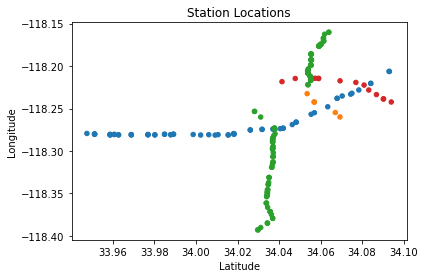

In [54]:
# map of station locations colored by freeway number
colors = [{10: 'tab:green', 110: 'tab:blue', 5: 'tab:red', 101: 'tab:orange'}[x] for x in meta['Fwy']]
p = meta.plot.scatter('Latitude', 'Longitude', title='Station Locations', c=colors)

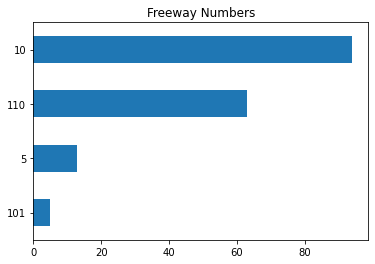

In [31]:
p = meta['Fwy'].value_counts(ascending=True).plot.barh(title='Freeway Numbers')

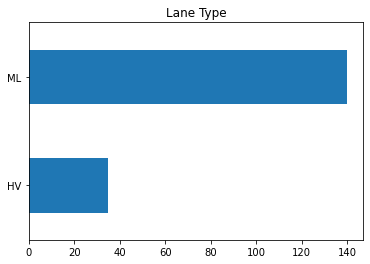

In [28]:
p = meta['Type'].value_counts(ascending=True).plot.barh(title='Lane Type')

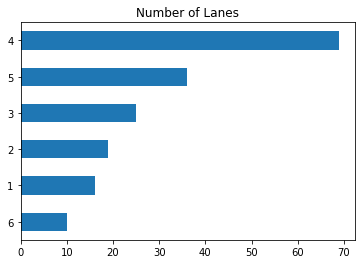

In [30]:
p = meta['Lanes'].value_counts(ascending=True).plot.barh(title='Number of Lanes')